Groupre 5 
les des membres de l’équipe :
        AYOUB ELMARABTI
        

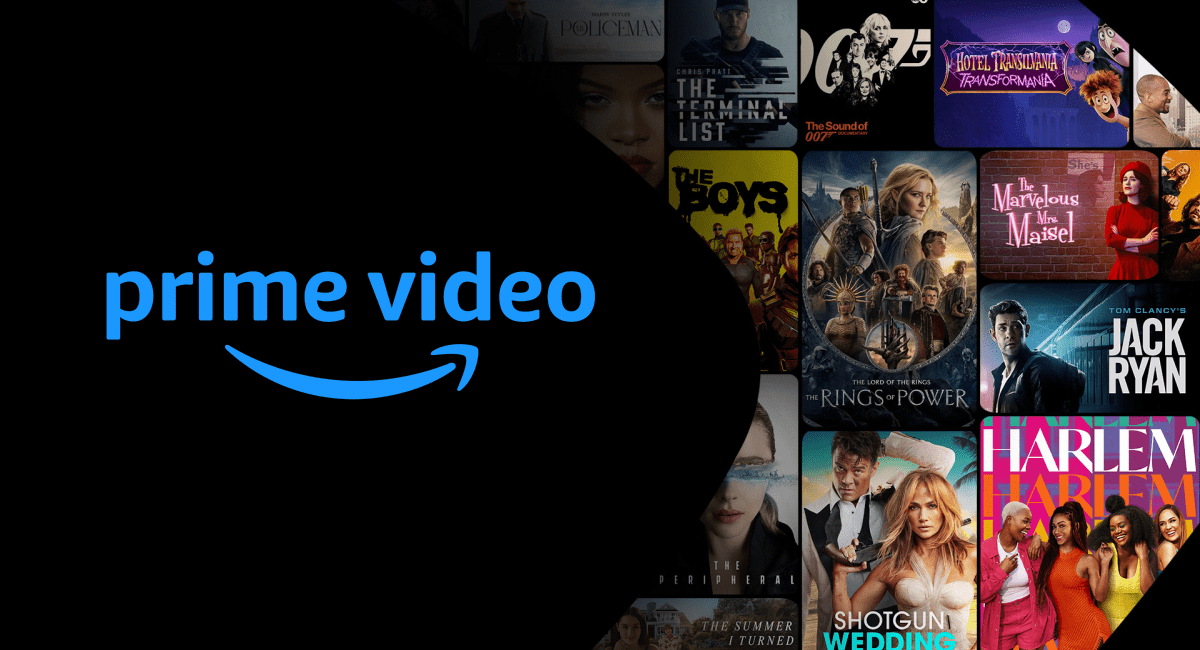
Introduction au Projet d'Analyse Exploratoire des Données (EDA) sur le Dataset Amazon.csv

Dans ce projet, nous explorerons le dataset "Amazon.csv" pour découvrir des tendances et des modèles cachés dans les données de séries télévisées et de films disponibles sur la plateforme de streaming Amazon Prime Video. Nous examinerons la distribution des évaluations des utilisateurs, les genres les plus populaires, les relations entre les évaluations et les performances des séries et des films, et bien plus encore. Notre objectif est de tirer des insights significatifs pour mieux comprendre le paysage du streaming vidéo sur Amazon Prime Video.

In [3]:
#import of packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')
sns.set_style('darkgrid')

In [4]:
#opening the database (dataset)
df=pd.read_csv('amazon.csv')

In [5]:
#retrieving the first 5 rows of the dataset 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [6]:
##retrieving the last 5 rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [7]:
#retrieving the format of the dataset 
df.shape

(9668, 12)

In [8]:
#retrieving the daset infos(types of variables)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [9]:
#retrieving the numeric variables
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [10]:
#checking  for duplicated lines 
df.duplicated().sum()

0

In [11]:
#checking for empty columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df['director'].fillna('Unknown', inplace=True)

In [13]:
#verifying the cleaning 
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
#cleaning the missing lines from the column cast (825 missing values)
#usinmg the filling with unknown methode 
df['cast'].fillna('Unknown', inplace=True)

In [15]:
#verifying the cast column cleaning 
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
#cleaning the missing lines from the column duration (3 missing values)
#usinmg the filling with unknown methode 
df['duration'].fillna('Unknown', inplace=True)


In [17]:
#verifying the duration column cleaning 
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
#cleaning the missing lines from the column rating (3 missing values)
#usinmg the filling with unknown methode 
df['rating'].fillna('Unknown', inplace=True)

In [19]:
#verifying the duration rating cleaning 
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         8996
date_added      9513
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
#cleaning the missing lines from the column date_added (10 missing values)
#usinmg the filling with unknown methode 
df['date_added'].fillna('Unknown', inplace=True)

In [21]:
#verifying the date_in  cleaning 
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         8996
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
#fragmentation of the cast column 
# i do keep only the first actor in the cast column as i assume that the first actor mentionned in the cast is in most times the most popular
df['Main actor'] = df['cast'].str.split(',').str[0].str.strip()

In [23]:
#verifying the fragmention
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Main actor
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Unknown,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Brendan Gleeson
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Mahesh Manjrekar
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Tom Sizemore
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Interviews with: Pink
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Unknown,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Harry Dean Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,Unknown,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Leo Gorcey
9664,s9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,Unknown,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",DICK VOSBURGH
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,Unknown,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Ray Stevenson
9666,s9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,Unknown,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Esteban Recagno


In [24]:
#fragmentation of the listed_in column 
# i do keep only the first category because i asssume that the first one metionned is the main one most of the times 
df['Main category'] = df['listed_in'].str.split(',').str[0].str.strip()

In [25]:
#verifying the fragmention
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Main actor,Main category
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Unknown,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Brendan Gleeson,Comedy
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Mahesh Manjrekar,Drama
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Tom Sizemore,Action
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Interviews with: Pink,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Unknown,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Harry Dean Stanton,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,Unknown,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Leo Gorcey,Comedy
9664,s9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,Unknown,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",DICK VOSBURGH,TV Shows
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,Unknown,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Ray Stevenson,Action
9666,s9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,Unknown,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Esteban Recagno,Drama


In [26]:
#i used the number of counts each time a category appears in the Main category column
top_categories = df['Main category'].value_counts().sort_values(ascending=False).head(5)
print(top_categories)

Main category
Drama          2216
Action         1657
Comedy         1475
Documentary     913
Horror          535
Name: count, dtype: int64


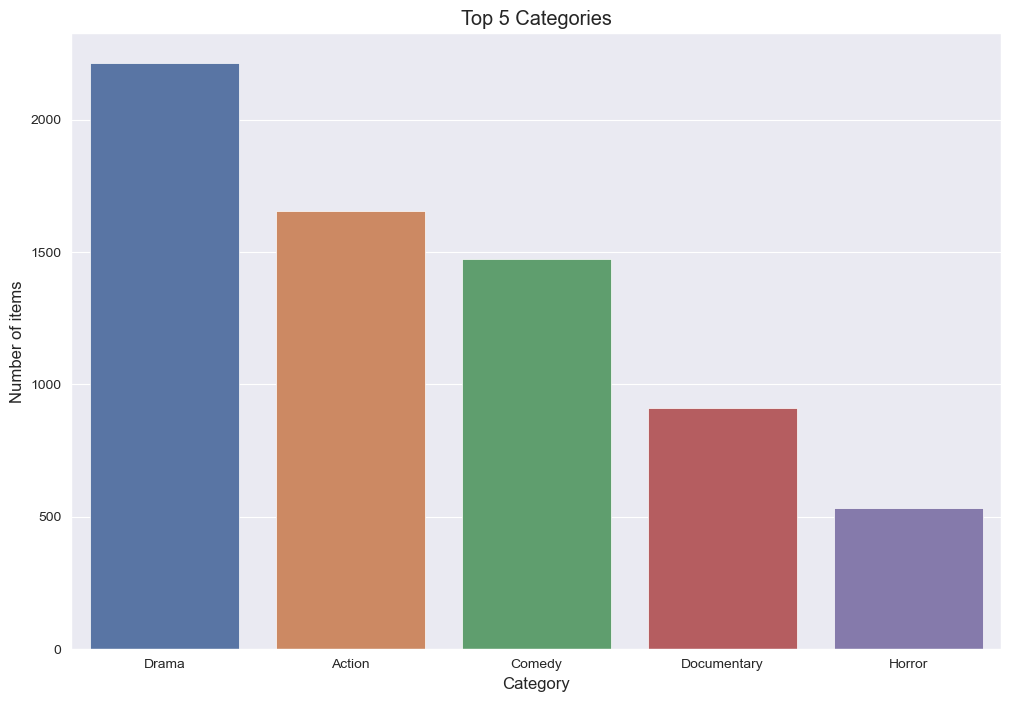

In [27]:
#
top_categories = df['Main category'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,8))
sns.barplot(y=top_categories.values, x=top_categories.index, palette='deep')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Number of items')
plt.show()

In [28]:
#i used the number of counts each time a director appears in the director column
top_director= df['director'].value_counts().sort_values(ascending=False).head(6)
top_director=top_director[1:]
print(top_director)

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


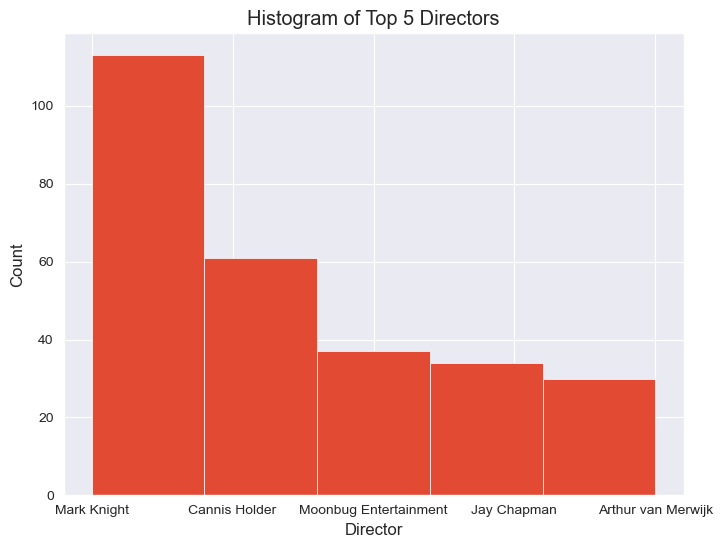

In [29]:
# Get the top 5 directors
top_director = df['director'].value_counts().sort_values(ascending=False).head(6)
top_director=top_director[1:]
# Create a histogram
plt.figure(figsize=(8,6))
plt.hist(df[df['director'].isin(top_director.index)]['director'], bins=5)
plt.title('Histogram of Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

In [30]:
#i used the number of counts each time a director appears in the director column
top_categories = df['Main actor'].value_counts().sort_values(ascending=False).head(10)
top_categories=top_categories[1:]
print(top_categories)

Main actor
Maggie Binkley        56
1                     35
Gene Autry            32
Anne-Marie Newland    25
Roy Rogers            23
Cassandra Peterson    22
John Wayne            21
Grace Tamayo          17
Michael J. Nelson     14
Name: count, dtype: int64


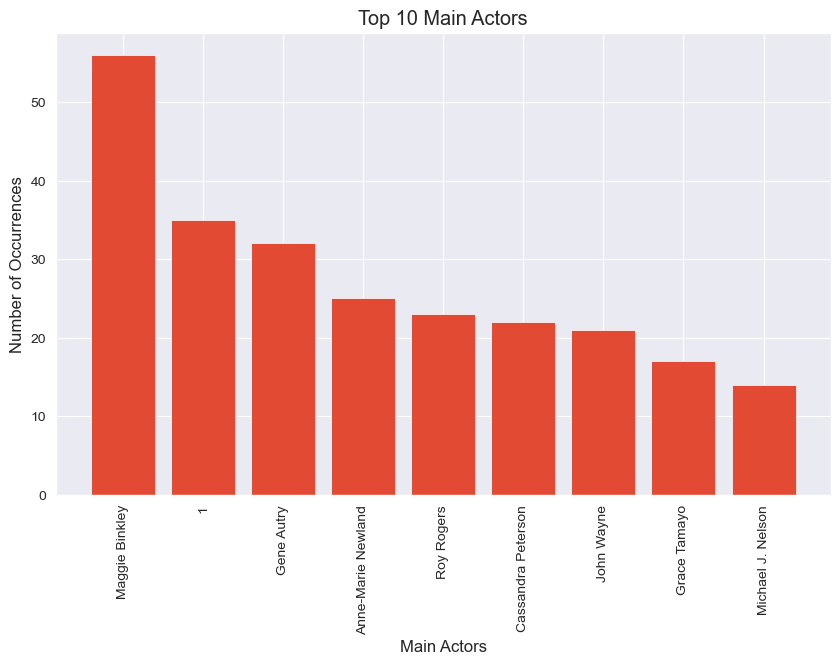

In [31]:
import matplotlib.pyplot as plt

# Get the top 10 categories
top_categories = df['Main actor'].value_counts().sort_values(ascending=False).head(10)
top_categories=top_categories[1:]
# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(top_categories.index, top_categories.values)
plt.title('Top 10 Main Actors')
plt.xlabel('Main Actors')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()


In [32]:
#Filtering TV shows, finding maximum duration, sorting in descending order, and selecting top 5
top_series = df[df['type'] == 'TV Show'].groupby('title')['duration'].max().sort_values(ascending=False).head(5)
print(top_series)

title
Suits                    9 Seasons
Vikings                  9 Seasons
'Allo 'Allo!             9 Seasons
American Horror Story    9 Seasons
Scrubs                   9 Seasons
Name: duration, dtype: object


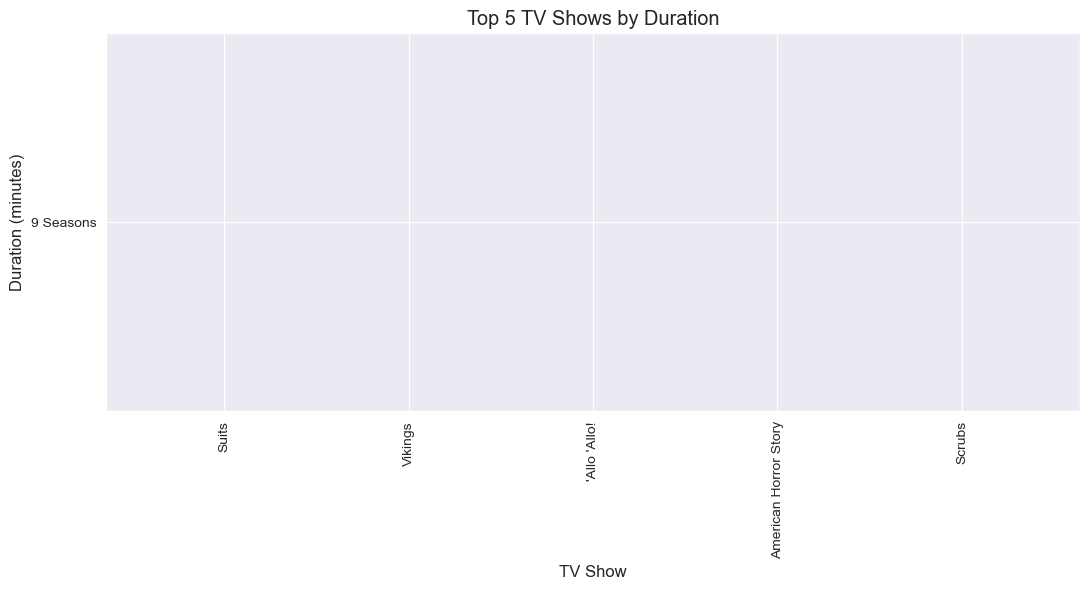

In [33]:
import matplotlib.pyplot as plt
import numpy as np

top_series = df[df['type'] == 'TV Show'].groupby('title')['duration'].max().sort_values(ascending=False).head(5)

# Define colors using a colormap based on the duration range
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(top_series)))

plt.figure(figsize=(11, 6))
plt.bar(top_series.index, top_series.values, color=colors)
plt.title('Top 5 TV Shows by Duration')
plt.xlabel('TV Show')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [34]:
df['content_type'] = df['type'].apply(lambda x: 'TV Show' if x == 'TV Show' else 'Movie')
print(df)

     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol          Unknown   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream          Unknown   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

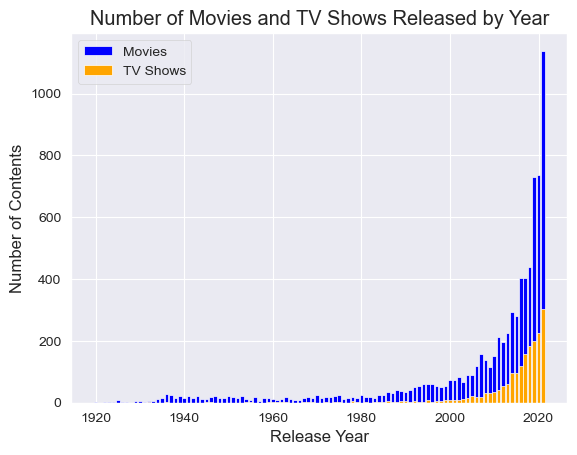

In [35]:


# Assign 'TV Show' or 'Movie' to 'content_type' column based on the value in the 'type' column
df['content_type'] = df['type'].apply(lambda x: 'TV Show' if x == 'TV Show' else 'Movie')

# Group the DataFrame by 'release_year' and 'content_type', count the occurrences of 'show_id', and reset the index
yearly_content = df.groupby(['release_year', 'content_type'])['show_id'].count().reset_index()

# Filter the 'yearly_content' DataFrame to include only movies
movies = yearly_content[yearly_content['content_type'] == 'Movie']

# Filter the 'yearly_content' DataFrame to include only TV shows
tv_shows = yearly_content[yearly_content['content_type'] == 'TV Show']

# Create a bar plot for movies, with 'release_year' on the x-axis and 'show_id' (count) on the y-axis
plt.bar(movies['release_year'], movies['show_id'], label='Movies', color='blue')
# Create a bar plot for TV shows, with 'release_year' on the x-axis and 'show_id' (count) on the y-axis
plt.bar(tv_shows['release_year'], tv_shows['show_id'], label='TV Shows', color='orange')

plt.title('Number of Movies and TV Shows Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Contents')
plt.legend()

plt.show()


In [36]:

import datetime as dt


# Replace "Unknown" with NaN
df['date_added'] = df['date_added'].replace("Unknown", np.nan)

# Convert the date_added column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Define the date range for the last 3 years
current_year = dt.datetime.now().year
start_date = dt.datetime(current_year-3, 1, 1)
end_date = dt.datetime(current_year, 1, 1)

# Filter the data to keep only entries within the date range
df_filtered = df[(df['date_added'] >= start_date) & (df['date_added'] < end_date)]

# Count the number of movies and TV shows produced in the last 3 years
movies_count = df_filtered[df_filtered['type'] == 'Movie']['type'].count()
tv_shows_count = df_filtered[df_filtered['type'] == 'TV Show']['type'].count()
print("Amazon has produced" ,movies_count,"movies this last 3 years")
print("Amazon has produced" ,tv_shows_count,"Tv Shows this last 3 years")
# Determine which type has more productions in the last 3 years
if movies_count > tv_shows_count:
    print("Amazon has focused more on producing movies in the last 3 years.")
elif movies_count < tv_shows_count:
    print("Amazon has focused more on producing TV shows in the last 3 years.")
else:
    print("Amazon has produced an equal number of movies and TV shows in the last 3 years.")

Amazon has produced 16 movies this last 3 years
Amazon has produced 139 Tv Shows this last 3 years
Amazon has focused more on producing TV shows in the last 3 years.


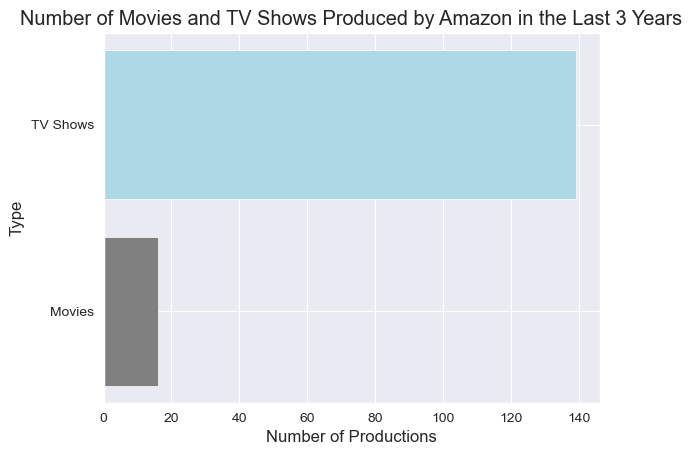

In [37]:
import matplotlib.pyplot as plt

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(['Movies', 'TV Shows'], [movies_count, tv_shows_count], color=['grey', 'lightblue'])

# Set chart title and axis labels
ax.set_title('Number of Movies and TV Shows Produced by Amazon in the Last 3 Years')
ax.set_xlabel('Number of Productions')
ax.set_ylabel('Type')

# Display the plot
plt.show()


"Nous aimerions exprimer notre profonde gratitude envers les membres de l'équipe suivants pour leur engagement et leur travail acharné tout au long de cette Analyse Exploratoire de Données :

    Ayoub Elmarabti
    Mohamed Amine Benyass
    Yasmina Boudalia

Leurs contributions ont été essentielles pour mener à bien ce projet. Nous tenons également à remercier chaleureusement notre superviseur, le Dr. Hamza Es-samaali, pour ses précieux conseils et son soutien tout au long du processus.

Ce projet n'aurait pas été possible sans l'effort et la collaboration de chacun. Nous sommes reconnaissants de faire partie d'une équipe aussi dévouée et talentueuse."